# OLIST CUSTOMER SEGMENTATION USING K - MEANS CLUSTERING ALGORITHMN
In this era of data driven business decision making, personalization is one of the concepts taking the centre stage. It has businesses to take smart budgeting, product design, promotion, marketing and customer satisfaction related decisions. One of the  fundamental steps towards better personalization is customer segmentation. Customer segmentation is the process by which customers are grouped into segments based on combination of common characteristics like gender, hobby, age, time spent on a website, time since user opened an app etc. In this work, I shall create customer segmentation for Brazilian E-commerce Dataset using the K-means clustering unsupervised machine learning algorithmn. The dataset contains approximately 100k online orders on olist website from 2016 to 2018. The Olist customer dataset used is at https://www.kaggle.com/code/yacinerouizi/e-commerce-customer-segmentation/data.  The dataset has 9 tables with each having information on different metrics on customer and their orders/transactions however, only 7 of the tables will be used because 2 have not information on customer identification.

## IMPORTATION OF DATA AND LIBRARIES

In [1]:
#importation of libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#loading of the 7 tables to be used
customers_df = pd.read_csv('olist_customers_dataset.csv')
items_df = pd.read_csv('olist_order_items_dataset.csv')
payments_df = pd.read_csv('olist_order_payments_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
categories_df = pd.read_csv('product_category_name_translation.csv')

## EXPLORATORY DATA ANALYSIS AND DATA PREPARATION

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
categories_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
dataframes = {'customers': customers_df,
              'items': items_df, 
              'payments': payments_df, 
              'orders': orders_df, 
              'products': products_df, 
              'sellers': sellers_df, 
              'categories': categories_df}
for i, j in dataframes.items():
    print(f'{i:12s} dataframe: {str(len(j)):7s} rows')

customers    dataframe: 99441   rows
items        dataframe: 112650  rows
payments     dataframe: 103886  rows
orders       dataframe: 99441   rows
products     dataframe: 32951   rows
sellers      dataframe: 3095    rows
categories   dataframe: 71      rows


### I Will Merge categories_df and product_df dataframes to use the English names

In [11]:
# products_df contains 73 unique categories, while categories_df contains 71: that's why we use left, 
# for missing categories we keep the category name in Portuguese.
products_df = pd.merge(products_df, categories_df, on='product_category_name', how='left')
# Delete 'product_category_name' column
del products_df['product_category_name']
# Delete  the categories_df dataframe
del categories_df
# Rename the column
products_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [12]:
#we now have product category names in English
products_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### I will merge all tables

In [13]:
df = pd.merge(orders_df, customers_df, on='customer_id')
df = df.merge(items_df, on='order_id')
df = df.merge(payments_df, on='order_id')
df = df.merge(products_df, on='product_id')
df = df.merge(sellers_df, on='seller_id')

In [14]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


### Visualization

C:\Users\HP 1O3O G2\AppData\Local\Temp\ipykernel_10528\3988164704.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


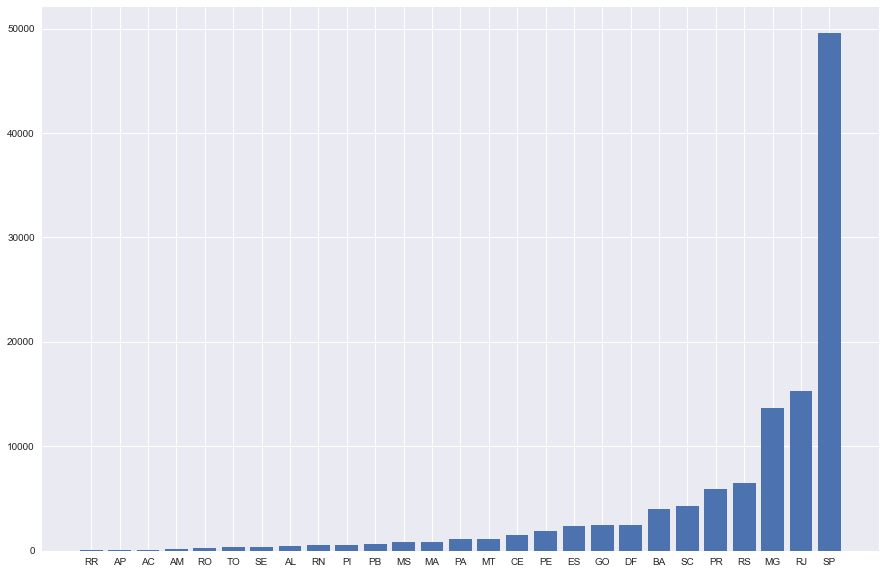

In [15]:
#customer by state
customer_by_state = df[['customer_unique_id', 'customer_state']].groupby('customer_state').count().reset_index()
customer_by_state = customer_by_state.sort_values(by=['customer_unique_id'])

plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.bar(customer_by_state['customer_state'], customer_by_state['customer_unique_id'])
plt.show()

In [16]:
#I will create 3 new columns and create visualization for order by period
df['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
df['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour

# I will create and visualize the order table
orders = df[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders.head(3)

,order_purchase_month,order_purchase_year,order_id,period
16,9,2016,3,9/2016
19,10,2016,381,10/2016
22,12,2016,1,12/2016


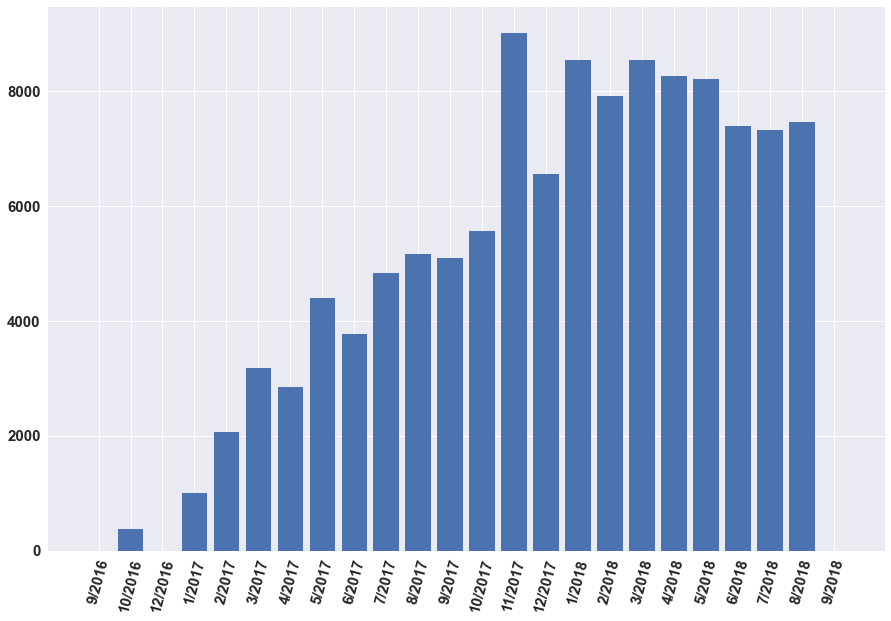

In [17]:
#order by period
plt.figure(figsize=(15,10))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

In [18]:
#Visualize top categories
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11426
3,sports_leisure,10279
4,computers_accessories,10186
5,housewares,9530
6,watches_gifts,6811
7,garden_tools,6129
8,telephony,5349
9,auto,5042


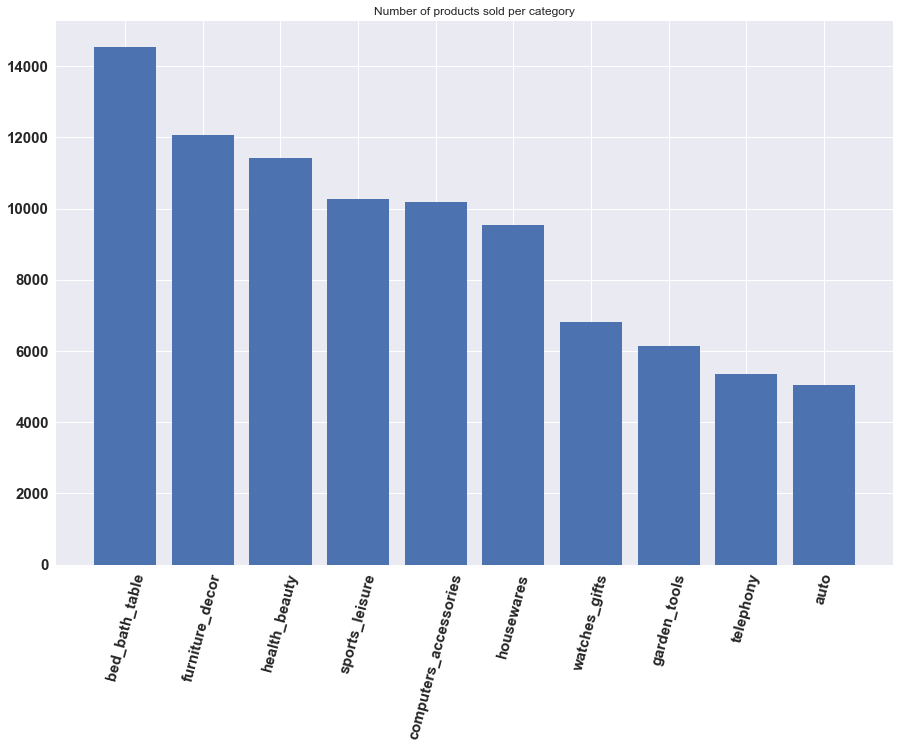

In [19]:
plt.figure(figsize=(15,10))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

### Data Preparation

In [20]:
#fetch the columns to be used
columns = ['order_status', 'customer_state', 'order_item_id', 'price', 
           'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 
           'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
df_selected = df[columns]
df_selected.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
0,delivered,SP,1,29.99,8.72,1,credit_card,1,18.12,2017,10,2,10
1,delivered,SP,1,29.99,8.72,3,voucher,1,2.00,2017,10,2,10
2,delivered,SP,1,29.99,8.72,2,voucher,1,18.59,2017,10,2,10
3,delivered,SP,1,29.99,7.78,1,credit_card,3,37.77,2017,8,15,18
4,delivered,SP,1,29.99,7.78,1,credit_card,1,37.77,2017,8,2,18


In [21]:
df_selected.shape

(117601, 13)

In [22]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_status          117601 non-null  object 
 1   customer_state        117601 non-null  object 
 2   order_item_id         117601 non-null  int64  
 3   price                 117601 non-null  float64
 4   freight_value         117601 non-null  float64
 5   payment_sequential    117601 non-null  int64  
 6   payment_type          117601 non-null  object 
 7   payment_installments  117601 non-null  int64  
 8   payment_value         117601 non-null  float64
 9   order_purchase_year   117601 non-null  int64  
 10  order_purchase_month  117601 non-null  int64  
 11  order_purchase_day    117601 non-null  int64  
 12  order_purchase_hour   117601 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 12.6+ MB


In [23]:
df_selected.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,1.195900,120.824783,20.045990,1.093528,2.939482,172.686752,2017.538193,6.028129,15.549757,14.760002
std,0.697706,184.479323,15.861315,0.726692,2.774223,267.592290,0.505065,3.229579,8.665830,5.325670
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,2017.000000,3.000000,8.000000,11.000000
50%,1.000000,74.900000,16.290000,1.000000,2.000000,108.210000,2018.000000,6.000000,16.000000,15.000000
75%,1.000000,134.900000,21.190000,1.000000,4.000000,189.260000,2018.000000,8.000000,23.000000,19.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,2018.000000,12.000000,31.000000,23.000000


In [24]:
#check for null values
df.isnull().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
customer_unique_id               False
customer_zip_code_prefix         False
customer_city                    False
customer_state                   False
order_item_id                    False
product_id                       False
seller_id                        False
shipping_limit_date              False
price                            False
freight_value                    False
payment_sequential               False
payment_type                     False
payment_installments             False
payment_value                    False
product_name_lenght               True
product_description_lenght        True
product_photos_qty                True
product_weight_g         

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
                  'payment_value', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
cat_attributes = ['order_status', 'customer_state', 'payment_type']

In [27]:
pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_transformed = pipeline.fit_transform(df_selected)
df_transformed

<117601x48 sparse matrix of type '<class 'numpy.float64'>'
	with 1528813 stored elements in Compressed Sparse Row format>

In [28]:
df_transformed.shape

(117601, 48)

In [29]:
#we convert the output which is a sparsed matrix to numpy array so as to perform dimensionality reduction
df_transformed = df_transformed.toarray()

In [30]:
#dimensionality reduction through PCA
from sklearn.decomposition import PCA

# Preserving 95% of the variance
pca = PCA(n_components=0.95)
df_transform_reduced = pca.fit_transform(df_transformed)
df_transform_reduced.shape

(117601, 13)

## CREATING THE CUSTOMER CLUSTER

### Selection of optimum k value (number of clusters)

In [31]:
from sklearn.cluster import KMeans

k_range = range(2, 15)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_transform_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

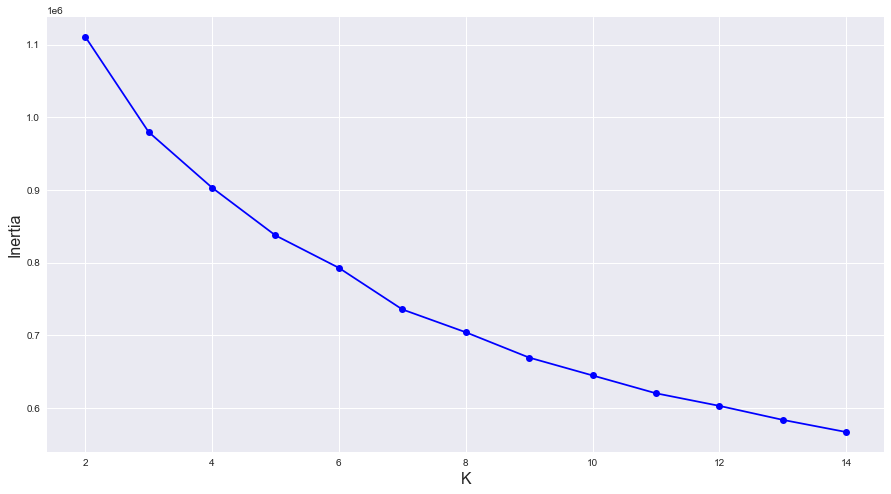

In [32]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_transform_reduced, model.labels_)
                      for model in kmeans_per_k]

In [34]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
# Best number of clusters
best_k

4

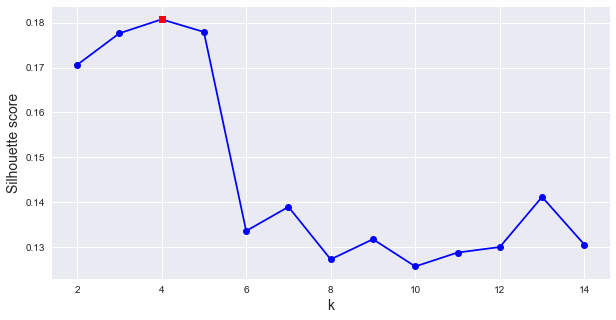

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

### Fitting the best model and using it for cluster prediction

In [36]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=4, random_state=42)

In [37]:
y_pred = best_model.fit_predict(df_transform_reduced)

In [38]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
for i in range(best_k):
    print(f"cluster {i + 1} contains: {np.sum(y_pred == i)} customers")

cluster 1 contains: 51310 customers
cluster 2 contains: 60698 customers
cluster 3 contains: 5065 customers
cluster 4 contains: 528 customers


In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_transform_reduced = tsne.fit_transform(df_transform_reduced)

C:\Users\HP 1O3O G2\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HP 1O3O G2\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


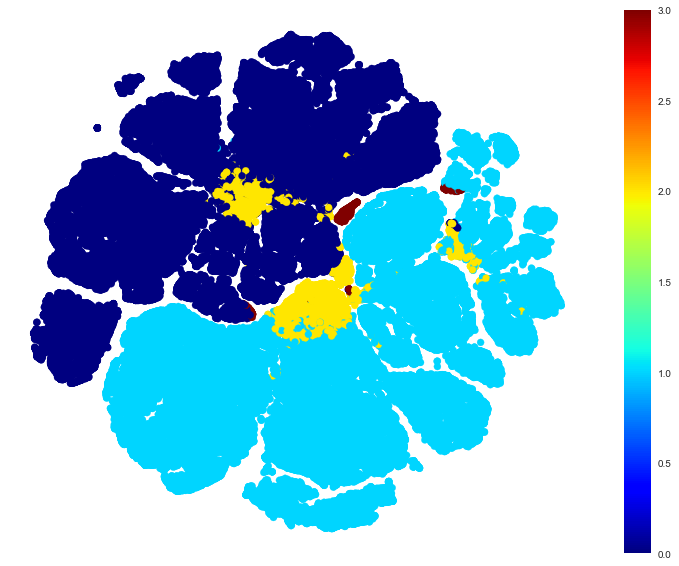

In [41]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_transform_reduced[:, 0], df_transform_reduced[:, 1],c=y_pred, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

### Adding the predicted clusters to the df so that customers and the clusters they belong can be directly read from the table

In [42]:
df['clusters'] = y_pred.tolist()

In [43]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour,clusters
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350,maua,SP,2017,10,2,10,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350,maua,SP,2017,10,2,10,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350,maua,SP,2017,10,2,10,0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,13.0,housewares,9350,maua,SP,2017,8,15,18,0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,13.0,housewares,9350,maua,SP,2017,8,2,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,28.0,construction_tools_lights,13660,porto ferreira,SP,2018,7,1,10,1
117597,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,78a159045124eb7601951b917a42034f,89111,...,11.0,auto,89031,blumenau,SC,2017,3,11,19,0
117598,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,30.0,furniture_decor,13478,americana,SP,2018,7,24,9,1
117599,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,...,41.0,furniture_decor,8320,sao paulo,SP,2018,5,22,21,1


## FURTHER EXPLORATION OF THE CLUSTERS

In [44]:
cluster = df[['customer_unique_id','clusters']].groupby(['clusters'], as_index = False).count()

In [45]:
cluster.columns = ['clusters','number_of_customers']

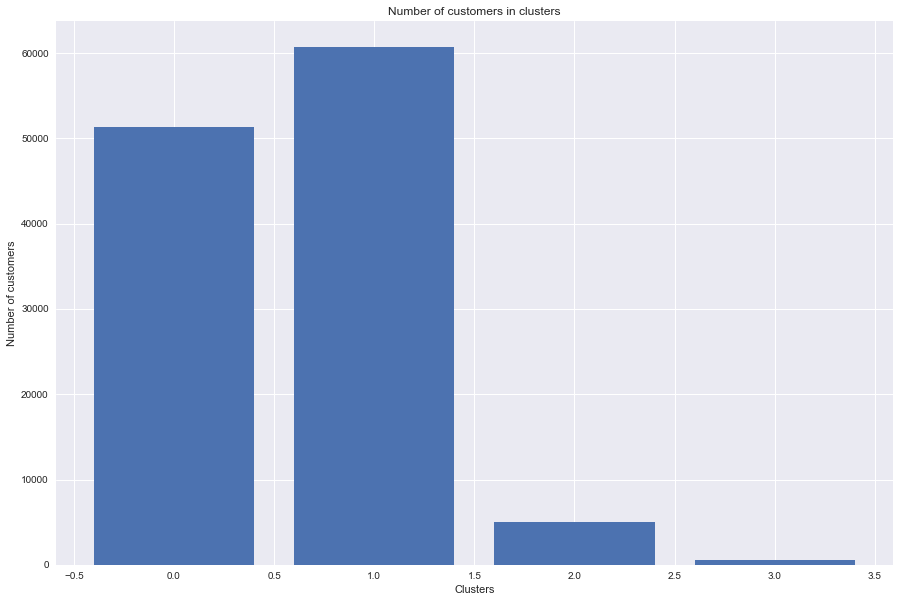

In [46]:
#plots of clusters versus number of customers
plt.figure(figsize=(15,10))
plt.xlabel("Clusters")
plt.ylabel("Number of customers")
plt.bar(cluster['clusters'], cluster['number_of_customers'])
plt.title('Number of customers in clusters')
plt.show()

In [50]:
# cluster 2 has outstanding payment value hence marketing effort targeted at customers in cluster 2 is likely to yield better 
# better reasult
df.groupby('clusters').mean()['payment_value']

clusters
0    136.225058
1    138.336353
2    969.939072
3     16.942538
Name: payment_value, dtype: float64